In [204]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [205]:
x = np.arange(0., 1.0+1.0E-10, 0.05)
y = 0.01*np.cos(2.*np.pi*x)
y2 = y + 0.0005*np.random.normal(0,1,21)

In [206]:
def norm(a):
    return np.linalg.norm(a);

def normal(t):
    tx, ty = t
    n = np.array([-ty, tx]);
    return n

def tangent(a, b, c):
    d1 = norm(b-a);
    d2 = norm(c-b)
    t = -a*d2/d1/(d1+d2) -b*(d1-d2)/d1/d2 + c*d1/d2/(d1+d2);
    l = norm(t);
    return (t/l)

def kappa(t1, t2, a, b):
    n = normal(b-a);  
    kn = t2 - t1;
    kappa = norm(kn)*np.sign(np.dot(kn,n))/norm(n);
    return kappa;
    
def tangent2(ta, tb, a, b):
    n = tb - ta;
    n = n*np.sign(kappa(ta, tb, a, b))/norm(n);
    t = -normal(n);
    return t;

def centroid(a,b):
    c = (a+b)*0.5
    return c;
   
def Hermite(a,b,ta,tb,s):
    l = norm(a-b);
    return ((2*(a-b) + l*(ta+tb))*s*s*s + (-3*(a-b) - l*(2*ta+tb))*s*s +  l*ta*s + a)

def dHermite(a,b,ta,tb,s):
    l = norm(a-b);
    t = 3*(2*(a-b)/l + (ta+tb))*s*s + 2*(-3*(a-b)/l - (2*ta+tb))*s +  ta
    return (t/norm(t))

def kappa5(a,b,c,d,e):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    td = tangent(c,d,e);
    xl = Hermite(b,c,tb,tc,0.5);
    xr = Hermite(c,d,tc,td,0.5);
    tl = dHermite(b,c,tb,tc,0.5);
    tr = dHermite(c,d,tc,td,0.5);
    return (kappa(tl, tr, xl, xr))

def kappa4(a,b,c,d):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    return (kappa(tb, tc, b, c))

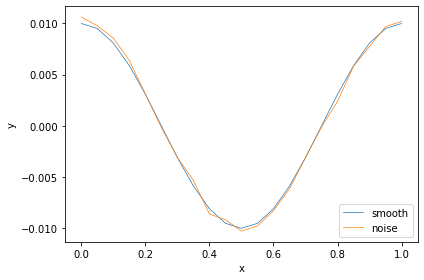

In [207]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "smooth")
ax1.plot(x, y2, linewidth = 0.7, label = "noise")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

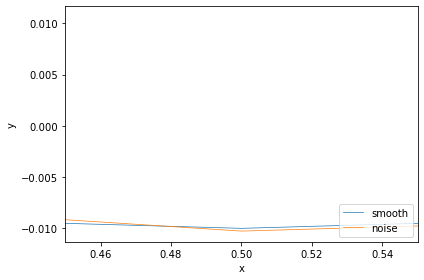

In [208]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "smooth")
ax1.plot(x, y2, linewidth = 0.7, label = "noise")
ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [209]:
def boundary(x,y):
    xb = []
    yb = []
    for i_ in range(5):
        i = 5-i_;
        xb.append(-x[i])
        yb.append(y[i])
    l, = np.shape(x)
    for i in range(l):
        xb.append(x[i])
        yb.append(y[i])
    for i_ in range(5):
        i = (l-2)-i_
        xb.append(2.0-x[i])
        yb.append(y[i])
    return xb,yb
def boundary_symm(s):
    sb = []
    for i_ in range(5):
        i = 5-i_;
        sb.append(s[i])
    l, = np.shape(s)
    for i in range(l):
        sb.append(s[i])
    for i_ in range(5):
        i = (l-2)-i_
        sb.append(s[i])
    return sb

def kappa_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    k = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        k.append(kappa5(a,b,c,d,e))
    return k;
def dk_ds_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    dkds = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        tb = tangent(a,b,c);
        tc = tangent(b,c,d);
        td = tangent(c,d,e);
        xl = Hermite(b,c,tb,tc,0.5);
        xr = Hermite(c,d,tc,td,0.5);
        kl = kappa4(a,b,c,d)
        kr = kappa4(b,c,d,e)
        val = (kr-kl)/norm(xr-xl);
        dkds.append(val)
    return dkds;

xb,yb = boundary(x,y)
kappav = kappa_vector(xb,yb)
dkappav = dk_ds_vector(xb,yb)

xb,yb2 = boundary(x,y2)
kappa2v = kappa_vector(xb,yb2)
dkappa2v = dk_ds_vector(xb,yb2)


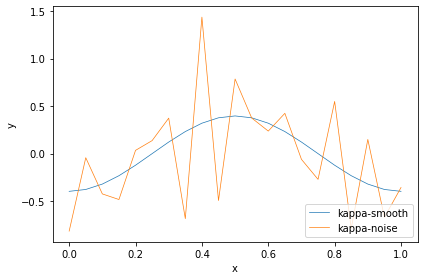

In [210]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, kappav, linewidth = 0.7, label = "kappa-smooth")
ax1.plot(x, kappa2v, linewidth = 0.7, label = "kappa-noise")

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

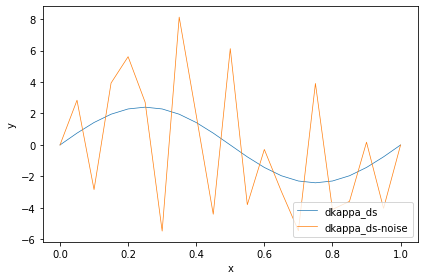

In [211]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, dkappav, linewidth = 0.7, label = "dkappa_ds")
ax1.plot(x, dkappa2v, linewidth = 0.7, label = "dkappa_ds-noise")
#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [212]:
def objective2(u,a,b,c,d,e): 
    n = normal(tangent(b,c,d));
    v = u*n;
    kl = kappa4(a,b,c+v,d);
    km = kappa5(a,b,c+v,d,e);
    kr = kappa4(b,c+v,d,e);
    o = np.power(2*km-kl-kr, 2);
    return o;


def smooth(xf, yf, N):
    for ii in range(N):
        xb, yb = boundary(xf,yf)
        ytemp = yf
        l, = np.shape(xf)
        for i_ in range(l):
            i = i_ + 5;
            a = np.array([xb[i-2],yb[i-2]]);
            b = np.array([xb[i-1],yb[i-1]]);
            c = np.array([xb[i],yb[i]]);
            d = np.array([xb[i+1],yb[i+1]]);
            e = np.array([xb[i+2],yb[i+2]]);
            u0 = 0.
            res = minimize(objective2, u0, args = (a,b,c,d,e), method='nelder-mead',
               options={'xatol': 1e-8, 'disp': False})
            n = normal(tangent(b,c,d));
            ytemp[i_] = ytemp[i_] + 0.1*n[1]*res.x
        yf = ytemp
        

In [213]:
y10 = np.copy(y2)
smooth(xf,y10,10)
y20 = np.copy(y2)
smooth(xf,y20,20)
y40 = np.copy(y2)
smooth(xf,y40,40)

In [198]:
y100 = np.copy(y40)
smooth(xf,y100,60)

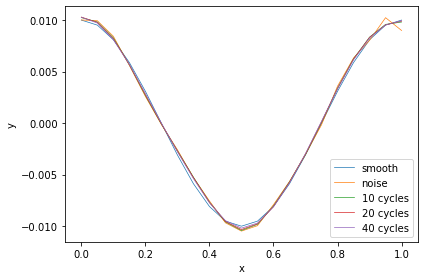

In [199]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "smooth")
ax1.plot(x, y2, linewidth = 0.7, label = "noise")
ax1.plot(x, y10, linewidth = 0.7, label = "10 cycles")
ax1.plot(x, y20, linewidth = 0.7, label = "20 cycles")
ax1.plot(x, y40, linewidth = 0.7, label = "40 cycles")


ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [203]:
xb,yb = boundary(x,y)
kappav = kappa_vector(xb,yb)
dkappav = dk_ds_vector(xb,yb)

xb,yb2 = boundary(x,y2)
kappa2v = kappa_vector(xb,yb2)
dkappa2v = dk_ds_vector(xb,yb2)

xb,yb2 = boundary(x,y10)
kappa10v = kappa_vector(xb,yb2)
dkappa10v = dk_ds_vector(xb,yb2)
xb,yb2 = boundary(x,y20)
kappa20v = kappa_vector(xb,yb2)
dkappa20v = dk_ds_vector(xb,yb2)
xb,yb2 = boundary(x,y40)
kappa40v = kappa_vector(xb,yb2)
dkappa40v = dk_ds_vector(xb,yb2)
xb,yb2 = boundary(x,y100)
kappa100v = kappa_vector(xb,yb2)
dkappa100v = dk_ds_vector(xb,yb2)

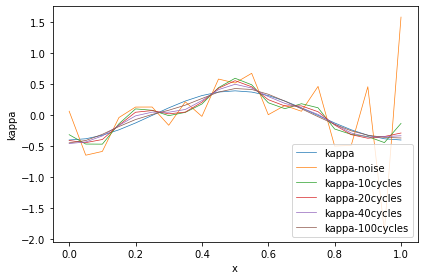

In [201]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("kappa")
ax1.plot(x, kappav, linewidth = 0.7, label = "kappa")
ax1.plot(x, kappa2v, linewidth = 0.7, label = "kappa-noise")
ax1.plot(x, kappa10v, linewidth = 0.7, label = "kappa-10cycles")
ax1.plot(x, kappa20v, linewidth = 0.7, label = "kappa-20cycles")
ax1.plot(x, kappa40v, linewidth = 0.7, label = "kappa-40cycles")
ax1.plot(x, kappa100v, linewidth = 0.7, label = "kappa-100cycles")


#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

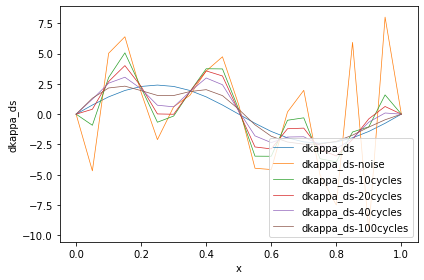

In [202]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("dkappa_ds")
ax1.plot(x, dkappav, linewidth = 0.7, label = "dkappa_ds")
ax1.plot(x, dkappa2v, linewidth = 0.7, label = "dkappa_ds-noise")
ax1.plot(x, dkappa10v, linewidth = 0.7, label = "dkappa_ds-10cycles")
ax1.plot(x, dkappa20v, linewidth = 0.7, label = "dkappa_ds-20cycles")
ax1.plot(x, dkappa40v, linewidth = 0.7, label = "dkappa_ds-40cycles")
ax1.plot(x, dkappa100v, linewidth = 0.7, label = "dkappa_ds-100cycles")


#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()